# Homework 7

## ASTR 5900, Fall 2017, University of Oklahoma

### KMeans and KDE

# Problem 1

### Part A

Load the Old Faithful data from http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat.  

A standard procedure in problems with multi-dimensional data is to standardize the data, or give each dimension the same scaling.  It is common to make every parameter distributed around 0 with a standard variance.  That is, find a new data set with parameters $y_{i}^{(j)}$ where:

$$ y_{i}^{(j)} = \frac{x_{i}^{(j)} - \mu^{(j)}}{\sigma^{(j)}}$$

Here $x_{i}^{(j)}$ is the $i$th data point in the $j$th dimension.

Transform the Old Faithful Data in this manner.

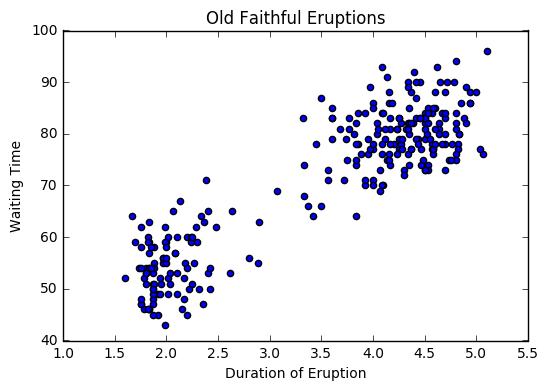

In [1]:
from matplotlib import pyplot as plt
import numpy as np
data = np.loadtxt('faithful.dat',skiprows=26)
x = data[:,0]
y = data[:,1]
z = data[:,2]

plt.scatter(y,z)
plt.xlabel('Duration of Eruption')
plt.ylabel('Waiting Time')
plt.title('Old Faithful Eruptions')
plt.show()


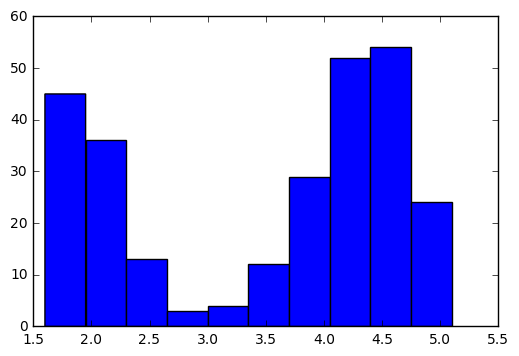

1.13927121023
3.48778308824
[ 3.6    1.8    3.333  2.283  4.533  2.883  4.7    3.6    1.95   4.35
  1.833  3.917  4.2    1.75   4.7    2.167  1.75   4.8    1.6    4.25   1.8
  1.75   3.45   3.067  4.533  3.6    1.967  4.083  3.85   4.433  4.3    4.467
  3.367  4.033  3.833  2.017  1.867  4.833  1.833  4.783  4.35   1.883
  4.567  1.75   4.533  3.317  3.833  2.1    4.633  2.     4.8    4.716
  1.833  4.833  1.733  4.883  3.717  1.667  4.567  4.317  2.233  4.5    1.75
  4.8    1.817  4.4    4.167  4.7    2.067  4.7    4.033  1.967  4.5    4.
  1.983  5.067  2.017  4.567  3.883  3.6    4.133  4.333  4.1    2.633
  4.067  4.933  3.95   4.517  2.167  4.     2.2    4.333  1.867  4.817
  1.833  4.3    4.667  3.75   1.867  4.9    2.483  4.367  2.1    4.5    4.05
  1.867  4.7    1.783  4.85   3.683  4.733  2.3    4.9    4.417  1.7    4.633
  2.317  4.6    1.817  4.417  2.617  4.067  4.25   1.967  4.6    3.767
  1.917  4.5    2.267  4.65   1.867  4.167  2.8    4.333  1.833  4.383
  1.883  4.933 

In [2]:
plt.hist(y)
plt.show()
print y.std()
print y.mean()
print y

In [3]:
mu1 = y.mean()
sigma1 = y.std()


y1=np.asarray(y)

for i in range(len(y1)):
    y1[i]=(y1[i]-mu1)/sigma1

4.80008190059e-16
1.0


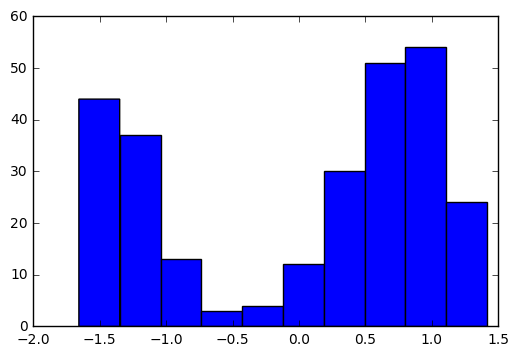

In [4]:
print y1.mean()
print y1.std()
plt.hist(y1)
plt.show()

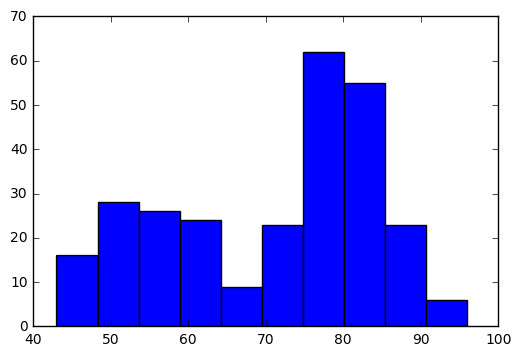

In [5]:
plt.hist(z)
plt.show()

In [6]:
mu2=z.mean()
sigma2=z.std()

z1=np.asarray(z)

for i in range(len(z1)):
    z1[i]=(z1[i]-mu2)/sigma2


4.40823848013e-16
1.0


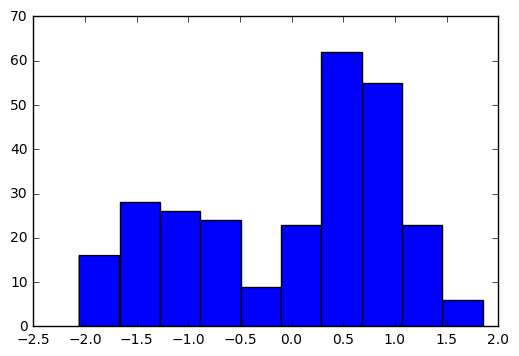

In [7]:
print z1.mean()
print z1.std()
plt.hist(z1)
plt.show()

### Part B

Use `scipy.cluster.vq.kmeans` or `sklearn.cluster.KMeans` to split the Old Faithful data into 2 clusters.  Plot the data with each point colored according to its cluster label.  Also plot the centers of the clusters by making it distinguishable from the data.

Read more at http://scikit-learn.org/stable/modules/density.html.  Consider looking at the examples on the `scikit-learn` website and the lecture.

In [8]:
from scipy.cluster.vq import kmeans,vq,whiten

In [9]:
temp = np.vstack((y1,z1))
x= temp.T
centroids,_ = kmeans(x,2)
idx,_ = vq(x,centroids)
print idx.shape
print idx.min(),idx.max()
print centroids
print centroids[1][0]

(272,)
0 1
[[-1.26008539 -1.20156744]
 [ 0.70970327  0.67674488]]
0.709703265311


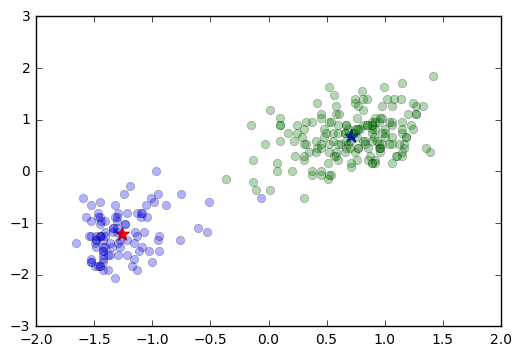

In [10]:
plt.plot(y1[idx==0],z1[idx==0],'o',alpha=0.3)
plt.plot(y1[idx==1],z1[idx==1],'o',alpha=0.3)
plt.scatter(centroids[0][0],centroids[0][1],marker='*',color='r',s=100)
plt.scatter(centroids[1][0],centroids[1][1],marker='*',color='b',s=100)
plt.show()

### Part C

Code from scratch (that is, with default python and `numpy` only) your own k-means clustering algorithm to split the data into 2 clusters.  Refer to the lecture and Figure 9.1 in Bishop.  Plot each step in the process

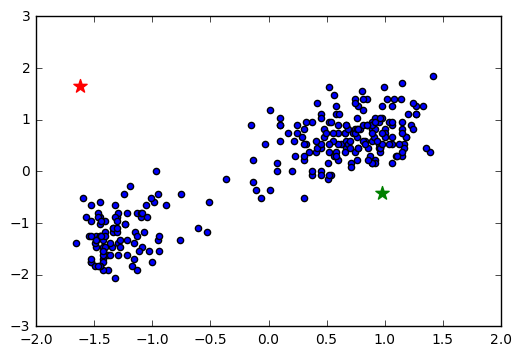

In [11]:
u1y=np.random.uniform(y1.min(),y1.max())
u1z=np.random.uniform(z1.min(),z1.max())
u2y=np.random.uniform(y1.min(),y1.max())
u2z=np.random.uniform(z1.min(),z1.max())

u1=[u1y,u1z]
u2=[u2y,u2z]
plt.scatter(y1,z1)
plt.scatter(u1[0],u1[1],marker='*',color='r',s=100)
plt.scatter(u2[0],u2[1],marker='*',color='g',s=100)
plt.show()
        
        



In [12]:
clusters = np.zeros(len(z1))

for i in range(len(z1)):
    
    xcoord=y1[i]
    ycoord=z1[i]
    
    dist_u1=np.sqrt((u1[0]-xcoord)**2 + (u1[1]-ycoord)**2 )
    dist_u2=np.sqrt((u2[0]-xcoord)**2 + (u2[1]-ycoord)**2 )
    
    if dist_u1 < dist_u2:
        clusters[i] = 0
    if dist_u1 > dist_u2:
        clusters[i]=1
        
print clusters
print len(clusters)
print len(z1)
print len(y1)


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [13]:


print np.count_nonzero(clusters)
y_1 = np.zeros(np.count_nonzero(clusters))
z_1 = np.zeros(np.count_nonzero(clusters))
y_0 = np.zeros(len(clusters) - np.count_nonzero(clusters))
z_0 = np.zeros(len(clusters) - np.count_nonzero(clusters))
print clusters[1]






a_number = -1
b_number = -1

for i in range(len(clusters)):
    if clusters[i] == 0.0:
        a_number += 1
        y_0[a_number]=y1[i]
        z_0[a_number]=z1[i]
    if clusters[i] == 1.0:
        b_number +=1
        y_1[b_number]=y1[i]
        z_1[b_number]=z1[i]
        

        



262
1.0


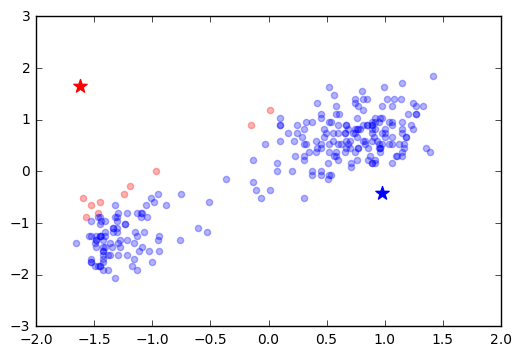

In [14]:
plt.scatter(u1[0],u1[1],marker='*',color='r',s=100)
plt.scatter(u2[0],u2[1],marker='*',color='b',s=100)
plt.scatter(y_0,z_0,alpha=0.3,color='r')
plt.scatter(y_1,z_1,alpha=0.3,color='b')
plt.show()

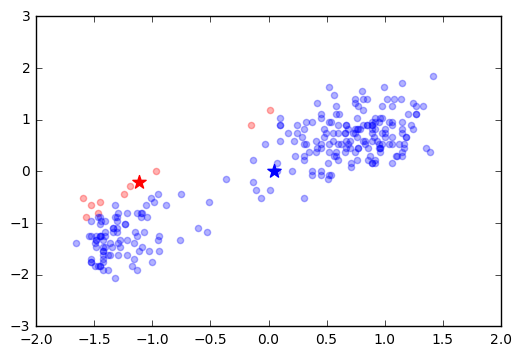

In [15]:
u1_y=(np.sum(y_0))/len(y_0)
u1_z=(np.sum(z_0))/len(z_0)
u2_y=(np.sum(y_1))/len(y_1)
u2_z=(np.sum(z_1))/len(z_1)

plt.scatter(u1_y,u1_z,marker='*',color='r',s=100)
plt.scatter(u2_y,u2_z,marker='*',color='b',s=100)
plt.scatter(y_0,z_0,alpha=0.3,color='r')
plt.scatter(y_1,z_1,alpha=0.3,color='b')
plt.show()

Now we iterate over our code over and over until we have an accurate cluster representation

In [16]:
clusters = np.zeros(len(z1))

for i in range(len(z1)):
    
    xcoord=y1[i]
    ycoord=z1[i]
    
    dist_u1=np.sqrt((u1_y-xcoord)**2 + (u1_z-ycoord)**2 )
    dist_u2=np.sqrt((u2_y-xcoord)**2 + (u2_z-ycoord)**2 )
    
    if dist_u1 < dist_u2:
        clusters[i] = 0
    if dist_u1 > dist_u2:
        clusters[i]=1

In [17]:
print np.count_nonzero(clusters)
y_1 = np.zeros(np.count_nonzero(clusters))
z_1 = np.zeros(np.count_nonzero(clusters))
y_0 = np.zeros(len(clusters) - np.count_nonzero(clusters))
z_0 = np.zeros(len(clusters) - np.count_nonzero(clusters))
print clusters[1]






a_number = -1
b_number = -1

for i in range(len(clusters)):
    if clusters[i] == 0.0:
        a_number += 1
        y_0[a_number]=y1[i]
        z_0[a_number]=z1[i]
    if clusters[i] == 1.0:
        b_number +=1
        y_1[b_number]=y1[i]
        z_1[b_number]=z1[i]

175
0.0


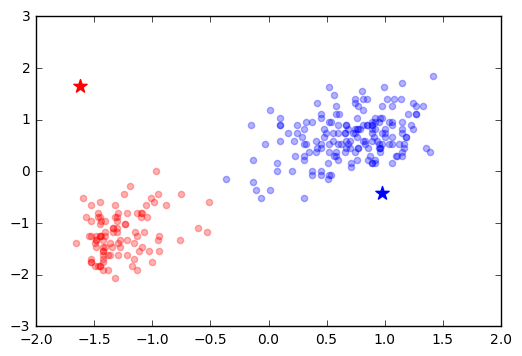

In [18]:
plt.scatter(u1[0],u1[1],marker='*',color='r',s=100)
plt.scatter(u2[0],u2[1],marker='*',color='b',s=100)
plt.scatter(y_0,z_0,alpha=0.3,color='r')
plt.scatter(y_1,z_1,alpha=0.3,color='b')
plt.show()

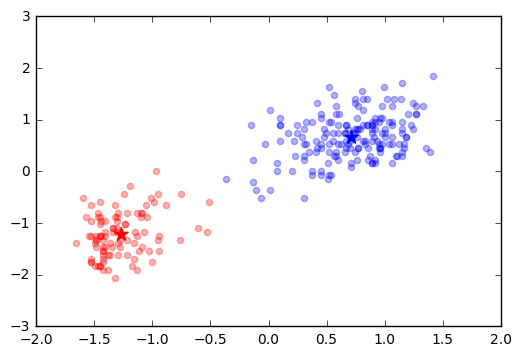

In [19]:
u1_y=(np.sum(y_0))/len(y_0)
u1_z=(np.sum(z_0))/len(z_0)
u2_y=(np.sum(y_1))/len(y_1)
u2_z=(np.sum(z_1))/len(z_1)

plt.scatter(u1_y,u1_z,marker='*',color='r',s=100)
plt.scatter(u2_y,u2_z,marker='*',color='b',s=100)
plt.scatter(y_0,z_0,alpha=0.3,color='r')
plt.scatter(y_1,z_1,alpha=0.3,color='b')
plt.show()

Now let's write a function that iterates for us, so there's less copy-and-paste-ing, also name our y-coordinate x and our z-coordinate y, to be less confusing (hopefully)

In [20]:
def K_means(iterations,x,y):
    u1x=np.random.uniform(x.min(),x.max(),1)
    u1y=np.random.uniform(y.min(),y.max(),1)
    u2x=np.random.uniform(x.min(),x.max(),1)
    u2y=np.random.uniform(y.min(),y.max(),1)
        
    u1 = [u1x,u1y]
    u2 = [u2x,u2y]
    
    
    
    
    for i in range(iterations):
         
        clusters = np.zeros(len(x))

        for i in range(len(x)):
    
            xcoord=x[i]
            ycoord=y[i]
    
            dist_u1=np.sqrt((u1[0]-xcoord)**2 + (u1[1]-ycoord)**2 )
            dist_u2=np.sqrt((u2[0]-xcoord)**2 + (u2[1]-ycoord)**2 )
    
            if dist_u1 < dist_u2:
                clusters[i] = 0
            if dist_u1 > dist_u2:
                clusters[i]=1
                
        x_1 = np.zeros(np.count_nonzero(clusters))
        y_1 = np.zeros(np.count_nonzero(clusters))
        x_0 = np.zeros(len(clusters) - np.count_nonzero(clusters))
        y_0 = np.zeros(len(clusters) - np.count_nonzero(clusters))
        
        a_number = -1
        b_number = -1

        for i in range(len(clusters)):
            if clusters[i] == 0.0:
                a_number += 1
                x_0[a_number]=x[i]
                y_0[a_number]=y[i]
            if clusters[i] == 1.0:
                b_number +=1
                x_1[b_number]=x[i]
                y_1[b_number]=y[i]
        
        
        u1x=(np.sum(x_0))/len(x_0)
        u1y=(np.sum(y_0))/len(y_0)
        u2x=(np.sum(x_1))/len(x_1)
        u2y=(np.sum(y_1))/len(y_1)
        
        u1=[u1x,u1y]
        u2=[u2x,u2y]
        
    plt.scatter(u1x,u1y,marker='*',color='r',s=100)
    plt.scatter(u2x,u2y,marker='*',color='b',s=100)
    plt.scatter(x_0,y_0,alpha=0.3,color='r')
    plt.scatter(x_1,y_1,alpha=0.3,color='b')
    plt.show()
        
    

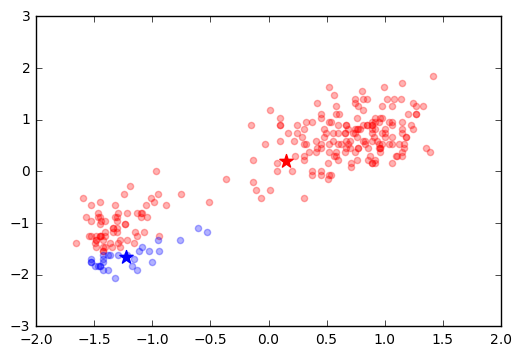

In [21]:
K_means(1,y1,z1)

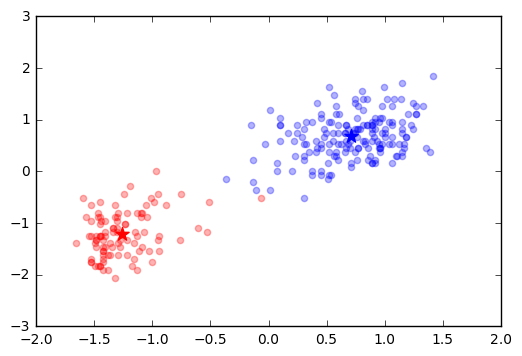

In [22]:
K_means(100,y1,z1)

# Problem 2

In this problem you will perform kernel density estimation to produce
an optimal representation of the Chandra X-ray observatory data from
NGC 4636.  The X-ray emission traces the emission of hot gas in the galaxy.
The data consist of a list of the positions of individual
photons on the detector in sky coordinates.

### Part A

Load the data of NGC 4636 from `ngc4636.dat`.

Create a plot showing the individual photon points using `matplotlib.pyplot`.

Plot a histogram of the data.  Experiment with the binsize and plot representation until you obtain a pleasing image of the galaxy.  Do you see any structure in the image
besides the central concentration of hot gas?  Explain.

Perform KDE data using `sklearn.neighbors.kde.KernelDensity`.  Experiment with the 
band width and kernel until you obtain a pleasing image of the galaxy.  Do you see any 
structure in the image besides the central concentration of hot gas?  Explain.
Note that KernelDensity.score_samples returns the log of the distribution.
Also note that it may help for plotting the image to sample the distribution on a grid;
refer to the example shown in class.

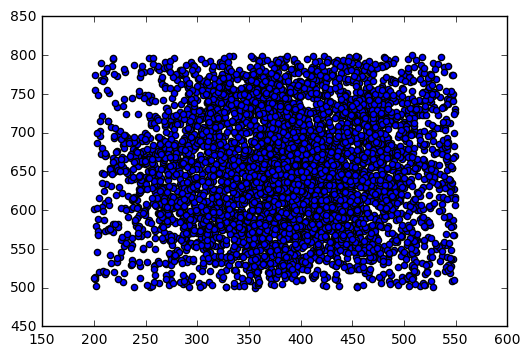

In [52]:
import numpy as np
from matplotlib import pyplot as plt
data=np.loadtxt('ngc4636.dat')
x=data[:,0]
y=data[:,1]
plt.scatter(x,y)
plt.show()

In [53]:
print x

[ 515.917  308.638  254.553 ...,  497.724  368.194  360.007]


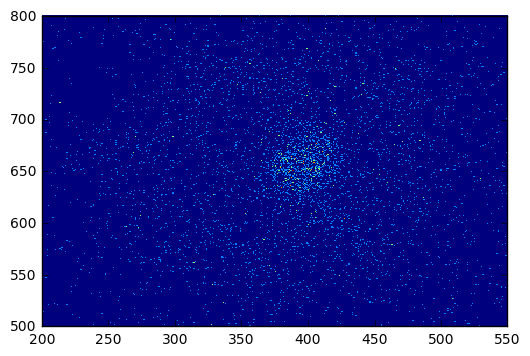

In [54]:
plt.hist2d(x,y,bins=400)

plt.show()

It looks like there is a concentration of stars below the central concentration forming a spiral arm.

In [55]:
from sklearn.neighbors import KernelDensity
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

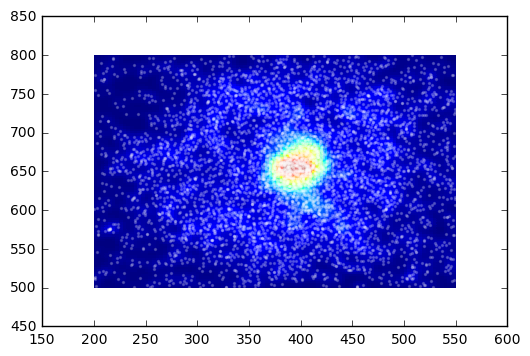

In [56]:
xx,yy,zz = kde2D(x,y,5)

plt.pcolormesh(xx,yy,zz)
plt.scatter(x,y,s=2,color='white',alpha=0.2)
plt.show()

The spiral arm below the central concentration is more prominent and a spiral arm above the central concentration is now visible.

### Part B

What is the optimal bandwidth to replicate the structure of the data?  One way to determine this value is to maximize the 'leave-one-out likelihood cross-validation' function:

$$ \text{CV}_l \, (h) = \frac{1}{N} \sum_{i=1}^{N} \log \hat{f}_{h, -i}(x_i)$$

where $\hat{f}_{h, -i}(x_i)$ is the estimated density at position $x_i$ with the $i$th data point left out and bandwith $h$.  Refer to the lecture.

You will want to create a 1D grid of 20 different values of h to test.  Examining the results
of part A, what do you think the minimum binsize should be?  Explain.  What do you think
the maximum binsize should be?  Explain.

In short, approximate the optimal bin size by finding the bin size (among a "good" sample of widths) that maximizes $CV_l$.

**NOTE: This calculation could take several minutes.  To test your code, you may wish to only consider a fraction of the galaxy data with only a few kernel widths.**

At the end of the day:
1. Print your optimal $h$  
2. Plot $CV_l$ versus the your $h$ samples (perhaps $\log h$)
3. Plot the estimated density of the galaxy using the optimal $h$

Based on my results from part A, I think the minimum binsize should be 5 and the max should be 15

In [65]:
xy_train  = np.vstack([y, x]).T
print xy_train
print x[0]
print y[0]

temp = np.linspace(0.68,1.2,20)
h_candidates=np.array(10.0**temp)
cv=np.zeros([h_candidates.shape[0],data.shape[0]])
#cv=[]
print cv.shape



[[ 588.195  515.917]
 [ 651.216  308.638]
 [ 719.569  254.553]
 ..., 
 [ 702.868  497.724]
 [ 627.79   368.194]
 [ 724.124  360.007]]
515.917
588.195
(20, 6051)


In [66]:
numh=h_candidates.shape[0]
print numh
print h_candidates

20
[  4.78630092   5.0976313    5.42921252   5.78236182   6.15848211
   6.55906758   6.98570958   7.44010299   7.92405294   8.43948197
   8.98843766   9.57310079  10.19579401  10.85899101  11.56532642
  12.31760621  13.1188189   13.97214738  14.88098157  15.84893192]


In [67]:
from sklearn.neighbors import kde

for i in range(numh):
    htemp=h_candidates[i]
    kde_skl = KernelDensity(bandwidth = htemp, kernel='gaussian')
    numpnts=data.shape[0]
    for j in range(20,numpnts-20):
        data_one_out=np.concatenate((data[0:j],data[j+1:numpnts]))
        kde_skl.fit(data_one_out)
        log_pdf = kde_skl.score_samples(data[j].reshape(1,-1))
        cv[i,j]=cv[i,j]+log_pdf[0]


The value of h when CV is maximized is h= [ 7.44010299]


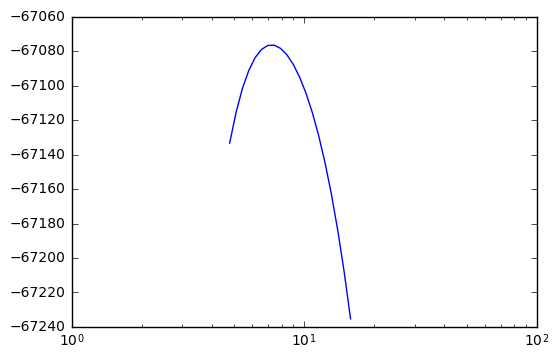

In [68]:
cv_out=np.zeros(20)
for i in range(20):
    cv_out[i]=cv[i,:].sum()
    

    
plt.semilogx(h_candidates,cv_out)

print 'The value of h when CV is maximized is h=',h_candidates[np.where(cv_out==cv_out.max())]
h_best = h_candidates[np.where(cv_out==cv_out.max())]
plt.show()

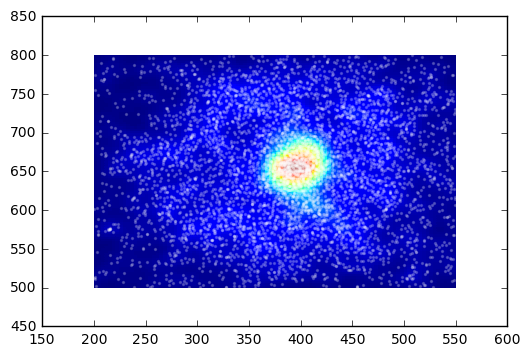

In [69]:
xx,yy,zz = kde2D(x,y,h_best)

plt.pcolormesh(xx,yy,zz)
plt.scatter(x,y,s=2,color='white',alpha=0.2)
plt.show()